In [3]:
import primer3
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import Entrez
import csv
import pandas as pd
from collections import defaultdict,OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
import csv
from Bio.Seq import Seq
import sys
sys.path.append('/home/jupyter/gitsss/yo/tao')
# from myprimer import *
from myfunc import *


In [10]:
cd /home/jupyter/Documents/ref/mouse/38

/home/jupyter/Documents/ref/mouse/38


In [12]:
ls

 gencode.vM23.primary_assembly.annotation.gtf.gz
 genome_assemblies_genome_fasta.tar
 genome_assemblies_repeatmasker_run.tar
 genome_assemblies_repeatmasker.tar
 Mus_musculus.GRCm38.dna.primary_assembly.fa
 Mus_musculus.GRCm38.dna.primary_assembly.fa.gz
 NC_005089.1.fasta
 rmsk_mm10.csv.gz
 snp_mm10.csv.gz
 trf_mm10.csv.gz
 trf_perfect_unit1_4_rp_9_30_mm10.csv
 trf_unit1_4_rp_9_30_mm10.csv
'Unconfirmed 663427.crdownload'


In [13]:
mm10 = SeqIO.index("Mus_musculus.GRCm38.dna.primary_assembly.fa", "fasta")

In [112]:
str(mm10['Y'][90828643-250:90828674+250].seq)

'CGCGGGCCACGGCAGAGACCAGGCAGGCCGGGATGGAAGAAGAAGGGAGAACCAGGACAGGGGGACAGACAGACACAGAGACCCGAGCTGCGCGGGCCACGGCAGAGACCAGGCAGGCCGGGATGGAAGAAGGAAGCAGGAGAAGGAAGGAGAAGGAAGGAGAAGGGAGAGCCGGGGGCTGCGGGACTCGTGGAAGCCGGGATGGGTCCCTCGATGGCGGACGCCGACGCCAGGCAGCCCCGGGTGGAAGGGAGGAGGAGGAGGAGGAGGAGGAGGAGGAGAGACTTAGAGTCAGACAGAGGGACAGAGAGAGACTTAGACACATAGACAGAGAGACAGAGAGAGGCTCTGTCCCTGCACTTCTACAGGTACAACCTGGAGCGGCGGCCGCGGACCTGAACCCCCGTCTGCCCGGGGACGCCGCCGACACGGCCGCACCGCAGGTCTGGAACCGCGGCTGGCCTTCGGGTCCCAGATCCGTCCCCACGAGGCAGAGAACCGGGGGTGCACTTGCGCGTTTTTCGCCACCGG'

In [113]:
len('CGCGGGCCACGGCAGAGACCAGGCAGGCCGGGATGGAAGAAGAAGGGAGAACCAGGACAGGGGGACAGACAGACACAGAGACCCGAGCTGCGCGGGCCACGGCAGAGACCAGGCAGGCCGGGATGGAAGAAGGAAGCAGGAGAAGGAAGGAGAAGGAAGGAGAAGGGAGAGCCGGGGGCTGCGGGACTCGTGGAAGCCGGGATGGGTCCCTCGATGGCGGACGCCGACGCCAGGCAGCCCCGGGTGGAAGGGAGGAGGAGGAGGAGGAGGAGGAGGAGGAGAGACTTAGAGTCAGACAGAGGGACAGAGAGAGACTTAGACACATAGACAGAGAGACAGAGAGAGGCTCTGTCCCTGCACTTCTACAGGTACAACCTGGAGCGGCGGCCGCGGACCTGAACCCCCGTCTGCCCGGGGACGCCGCCGACACGGCCGCACCGCAGGTCTGGAACCGCGGCTGGCCTTCGGGTCCCAGATCCGTCCCCACGAGGCAGAGAACCGGGGGTGCACTTGCGCGTTTTTCGCCACCGG')

531

In [23]:
trf1_4= pd.read_csv('trf_perfect_unit1_4_rp_9_30_mm10.csv',skiprows=[0,])


In [25]:
trf1_4.columns

Index(['#"bin"', 'chrom', 'chromStart', 'chromEnd', 'name', 'period',
       'copyNum', 'consensusSize', 'perMatch', 'perIndel', 'score', 'A', 'C',
       'G', 'T', 'entropy', 'sequence'],
      dtype='object')

In [40]:
chrs_trf1_4 = trf1_4.loc[trf1_4['chrom'].isin(trf1_4.chrom.unique()[:21].tolist())]


In [41]:
len(chrs_trf1_4)

288502

In [46]:
def get_chr_number(x):
    return str(x[3:])

In [47]:
'chr1'[3:]

'1'

In [48]:
chrs_trf1_4['ref_chr_index']=chrs_trf1_4['chrom'].apply(get_chr_number)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
chrs_trf1_4 = trf1_4.loc[trf1_4['chrom'].isin(trf1_4.chrom.unique()[:21].tolist())]


In [58]:
chrs_trf1_4=chrs_trf1_4.sort_values(by = ['chrom', 'chromStart'], ascending = [True, True], na_position = 'first')


<AxesSubplot:>

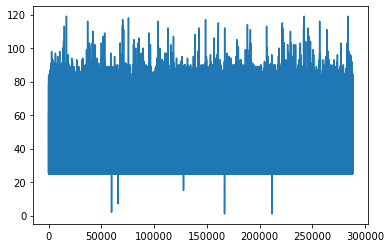

In [65]:
chrs_trf1_4['msize'].plot()

In [68]:
# chrs_trf1_4 = 
chrs_trf1_4.loc[chrs_trf1_4['msize']<80]


,index,"#""bin""",chrom,chromStart,chromEnd,name,period,copyNum,consensusSize,perMatch,perIndel,score,A,C,G,T,entropy,sequence,ref_chr_index,msize
0,3,607,chr1,3000097,3000123,trf,1,26.0,1,100,0,52,0,0,0,100,0.00,T,1,26
1,4,607,chr1,3011924,3011970,trf,2,23.0,2,100,0,92,50,0,0,50,1.00,TA,1,46
2,5,608,chr1,3045468,3045497,trf,2,14.5,2,100,0,58,48,51,0,0,1.00,CA,1,29
3,6,608,chr1,3050173,3050210,trf,3,12.3,3,100,0,74,0,67,0,32,0.91,CTC,1,37
4,7,608,chr1,3050954,3051003,trf,2,24.5,2,100,0,98,51,48,0,0,1.00,AC,1,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288497,173326,1277,chrY,90828643,90828674,trf,3,10.3,3,100,0,62,32,0,67,0,0.91,GGA,Y,31
288498,173327,1277,chrY,90829592,90829641,trf,2,24.5,2,100,0,98,51,48,0,0,1.00,AC,Y,49
288499,173328,1277,chrY,90832359,90832389,trf,2,15.0,2,100,0,60,50,0,50,0,1.00,AG,Y,30
288500,173329,1277,chrY,90832388,90832418,trf,2,15.0,2,100,0,60,0,0,50,50,1.00,GT,Y,30


In [69]:
len(chrs_trf1_4)

288502

In [60]:
chrs_trf1_4.reset_index(inplace=True)

In [72]:
chrs_trf1_4.columns

Index(['index', '#"bin"', 'chrom', 'chromStart', 'chromEnd', 'name', 'period',
       'copyNum', 'consensusSize', 'perMatch', 'perIndel', 'score', 'A', 'C',
       'G', 'T', 'entropy', 'sequence', 'ref_chr_index', 'msize'],
      dtype='object')

In [73]:
mm10_str=chrs_trf1_4.to_dict(orient='index')

In [94]:
keys=list(mm10_str.keys())

In [95]:
type(keys)

list

In [85]:
GLOBAL_ARGS = {
    'PRIMER_TASK': 'pick_detection_primers',
    'PRIMER_PICK_INTERNAL_OLIGO': 0,
    'PRIMER_INTERNAL_MAX_SELF_END': 8,
    'PRIMER_OPT_SIZE': 20,
    'PRIMER_MIN_SIZE': 18,
    'PRIMER_MAX_SIZE': 32,
    'PRIMER_OPT_TM': 55,
    'PRIMER_MIN_TM': 53,
    'PRIMER_MAX_TM': 62,
    'PRIMER_DNA_CONC': 50.0,
    'PRIMER_SALT_CORRECTIONS':1,
    'PRIMER_TM_FORMULA': 1,
    'PRIMER_SALT_DIVALENT':1.5,
    'PRIMER_DNTP_CONC':0.6, 
    'PRIMER_MIN_GC': 20,
    'PRIMER_MAX_GC': 80,
    'PRIMER_MAX_POLY_X': 5,
    'PRIMER_INTERNAL_MAX_POLY_X': 5,
    'PRIMER_MAX_NS_ACCEPTED': 0,
    'PRIMER_MAX_SELF_ANY': 12,
    'PRIMER_MAX_SELF_END': 8,
    'PRIMER_PAIR_MAX_COMPL_ANY': 12,
    'PRIMER_PAIR_MAX_COMPL_END': 8,
    'PRIMER_PAIR_MAX_DIFF_TM': 2.0,
    'PRIMER_NUM_RETURN': 1000,
    'PRIMER_FILE_FLAG': 0,
    'P3_FILE_FLAG': 0,
    'PRIMER_PRODUCT_SIZE_RANGE': [[180, 240]]}
mips = {
    'PRIMER_MIN_GC': 26,
    'PRIMER_MAX_GC': 70,
    'PRIMER_MAX_POLY_X': 3,
    'PRIMER_INTERNAL_MAX_POLY_X': 3,
    'PRIMER_DNA_CONC': 50.0,
    'PRIMER_MAX_NS_ACCEPTED': 0,
    'PRIMER_MAX_SELF_ANY': 12,
    'PRIMER_MAX_SELF_END': 8,
    'PRIMER_PAIR_MAX_COMPL_ANY': 12,
    'PRIMER_PAIR_MAX_COMPL_END': 0,
    'PRIMER_PAIR_MAX_DIFF_TM': 4.0,
    'PRIMER_OPT_SIZE': 25,
    'PRIMER_MIN_SIZE': 18,
    'PRIMER_MAX_SIZE': 30,
    'PRIMER_OPT_TM': 56,
    'PRIMER_MIN_TM': 51,
    'PRIMER_MAX_TM': 65,
    'PRIMER_NUM_RETURN': 100,
    'PRIMER_PRODUCT_SIZE_RANGE': [[130, 200]]}

GLOBAL_ARGS.update(mips)

In [116]:
def designprimer(x):
    c=mm10_str[x]['ref_chr_index']
    s=mm10_str[x]['chromStart']
    e=mm10_str[x]['chromEnd']
    primer_details = dict()
#     target_start=item['Start Position']
    target_start=250
    blank=250
    target_size=mm10_str[x]['msize']
    safe_buffer=1
    primer_details['SEQUENCE_ID'] = c+"_"+str(s)+"_"+str(e)
    primer_details['SEQUENCE_TEMPLATE'] = str(mm10[c][s-blank:e+blank].seq)
#     print (primer_details['SEQUENCE_TEMPLATE'] ,len(primer_details['SEQUENCE_TEMPLATE'] ))
    primer_details['SEQUENCE_EXCLUDED_REGION'] = [target_start-safe_buffer,target_size+safe_buffer]
    primer_details['SEQUENCE_TARGET'] = [target_start-safe_buffer,target_size+safe_buffer]
#     print (primer_details)
    try:
        primer3_output=primer3.designPrimers(primer_details,GLOBAL_ARGS)
        return {x:primer3_output}
    except:
        return {x:{x:'failed'}}

In [ ]:
from multiprocessing import Pool, TimeoutError
import time
import os


if __name__ == '__main__':
    # start 4 worker processes
    with Pool(processes=8) as pool:

        # print "[0, 1, 4,..., 81]"
        output=pool.map(designprimer, keys)

    # exiting the 'with'-block has stopped the pool
    print("Now the pool is closed and no longer available")

In [ ]:
import pickle


with open('mm10_output.pickle', 'wb') as handle:
    pickle.dump(output, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

# print(a == b)

# Primer Design


PRIMER_TM_FORMULA (int; default 1)
Specifies details of melting temperature calculation. (New in v. 1.1.0, added by Maido Remm and Triinu Koressaar.)

A value of 0 directs Primer3 to a backward compatible calculation (in other words, the only calculation available in previous version of Primer3).

This backward compatible calculation uses the table of thermodynamic parameters in the paper [Breslauer KJ, Frank R, Blöcker H and Marky LA (1986) "Predicting DNA duplex stability from the base sequence" Proc Natl Acad Sci 83:4746-50 http://dx.doi.org/10.1073/pnas.83.11.3746], and the method in the paper [Rychlik W, Spencer WJ and Rhoads RE (1990) "Optimization of the annealing temperature for DNA amplification in vitro", Nucleic Acids Res 18:6409-12 http://dx.doi.org/10.1093/nar/18.21.6409].

A value of 1 (*RECOMMENDED*) directs Primer3 to use the table of thermodynamic values and the method for melting temperature calculation suggested in the paper [SantaLucia JR (1998) "A unified view of polymer, dumbbell and oligonucleotide DNA nearest-neighbor thermodynamics", Proc Natl Acad Sci 95:1460-65 http://dx.doi.org/10.1073/pnas.95.4.1460].

Use tag PRIMER_SALT_CORRECTIONS, to specify the salt correction method for melting temperature calculation.

Example of calculating the melting temperature of an oligo if PRIMER_TM_FORMULA=1 and PRIMER_SALT_CORRECTIONS=1 recommended values):
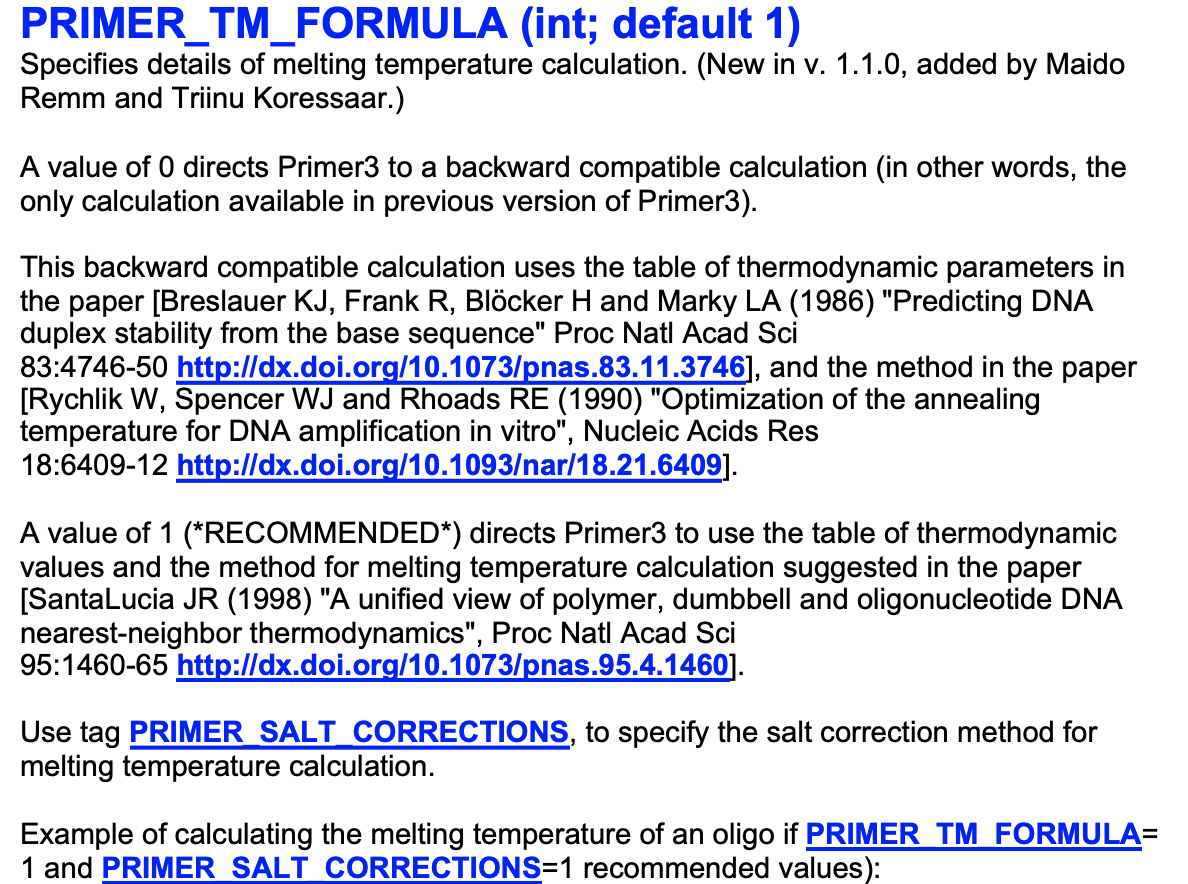

In [69]:
for k,i in candidates.items():
    i['target_primers']=dict()

### Setting specific parameters for mips: 
NTR_5= "TCGTCGGCAGCGTCAGATGTGTATAAGAGACAG"
NTR_7="GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAG"


mips = {
    'PRIMER_MIN_GC': 26,
    'PRIMER_MAX_GC': 70,
    'PRIMER_MAX_POLY_X': 3,
    'PRIMER_INTERNAL_MAX_POLY_X': 3,
    'PRIMER_DNA_CONC': 50.0,
    'PRIMER_MAX_NS_ACCEPTED': 0,
    'PRIMER_MAX_SELF_ANY': 12,
    'PRIMER_MAX_SELF_END': 8,
    'PRIMER_PAIR_MAX_COMPL_ANY': 12,
    'PRIMER_PAIR_MAX_COMPL_END': 0,
    'PRIMER_PAIR_MAX_DIFF_TM': 4.0,
    'PRIMER_OPT_SIZE': 25,
    'PRIMER_MIN_SIZE': 18,
    'PRIMER_MAX_SIZE': 30,
    'PRIMER_OPT_TM': 56,
    'PRIMER_MIN_TM': 51,
    'PRIMER_MAX_TM': 65,
    'PRIMER_NUM_RETURN': 100,
    'PRIMER_PRODUCT_SIZE_RANGE': [[130, 200]]}

GLOBAL_ARGS.update(mips)


#### Setting target range
for key, item in candidates.items():
    primer_details = dict()
#     target_start=item['Start Position']
    target_start=250

    target_size=10
#     print (item['Hugo_Symbol'])
    safe_buffer=5
    primer_details['SEQUENCE_ID'] = item['Hugo_Symbol']
    primer_details['SEQUENCE_TEMPLATE'] = str(item["tmlt"])
    primer_details['SEQUENCE_EXCLUDED_REGION'] = [target_start-safe_buffer,target_size+safe_buffer]
    primer_details['SEQUENCE_TARGET'] = [target_start-safe_buffer,target_size+safe_buffer]
    primer3_output=primer3.designPrimers(primer_details,GLOBAL_ARGS)
    ## Parsing result
    target_primers = dict()
    chromosome =(item['chr_num'])
    number_of_primers = primer3_output['PRIMER_PAIR_NUM_RETURNED']
    for i in range(number_of_primers):
        target_primers[i] = {}
        target_primers[i]['LEFT'] = primer3_output['PRIMER_LEFT_{}_SEQUENCE'.format(i)]
        target_primers[i]['RIGHT'] = primer3_output['PRIMER_RIGHT_{}_SEQUENCE'.format(i)]
        target_primers[i]['LEFT_TM'] = primer3_output['PRIMER_LEFT_{}_TM'.format(i)]
        target_primers[i]['RIGHT_TM'] = primer3_output['PRIMER_RIGHT_{}_TM'.format(i)]
        target_primers[i]['LEFT_START'] = primer3_output['PRIMER_LEFT_{}'.format(i)]
        target_primers[i]['RIGHT_START'] = primer3_output['PRIMER_RIGHT_{}'.format(i)]
        target_primers[i]['Chromosome'] = chromosome
        target_primers[i]['nexfwd']=NTR_5+primer3_output['PRIMER_LEFT_{}_SEQUENCE'.format(i)]
        target_primers[i]['nexrev']=NTR_7+primer3_output['PRIMER_RIGHT_{}_SEQUENCE'.format(i)]

        target_primers[i]['AMPLICON_START_END'] = (primer3_output['PRIMER_LEFT_{}'.format(i)][0],primer3_output['PRIMER_RIGHT_{}'.format(i)][0]+1)
        target_primers[i]['AMPLICON_SIZE'] = primer3_output['PRIMER_RIGHT_{}'.format(i)][0]-primer3_output['PRIMER_LEFT_{}'.format(i)][0]+1
#         print  (target_primers)
    item['target_primers']=target_primers
    if len(target_primers)>0:
        for kk,ii in target_primers[0].items():
#             kkk=str(kk)+'_0'
            item[kk]=ii

    else:
        print ('no primer returned for {}'.format(item['Hugo_Symbol']))

no primer returned for MYO1C
no primer returned for FJX1


In [70]:
dftt=pd.DataFrame.from_dict(candidates,orient='index')
outname='/Users/ltao/Projects/glioma/design/202007_glioma_dna_primers.xlsx'
dftt.to_excel(outname)